<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="200" height="200"><br>
</center>

# Chapter.8  이미지를 위한 인공 신경망

## 08-1 합성곱 신경망의 구성 요소

### - 합성곱

합성곱은 마치 입력 데이터에 마법의 도장을 찍어서 유용한 특성만 드러나게 하는 것으로 드러나게 하는 것으로 비유할 수 있다. 그럼 여기서 합성곱의 동작 원리를 자세히 알아보자. 7장에서 사용한 밀집층에는 뉴런마다 입력 개수만큼의 가중치가 있다. 즉 모든 입력에 가중치를 곱한다.

인공 신경망은 처음에 가중치 w1 ~ w10과 절편 b를 랜덤하게 초기화한 다음 에포크를 반복하면서 경사 하강법 알고리즘을 사용하여 손실이 낮아지도록 최적의 가중치와 절편을 찾아간다. 이것이 바로 모델 훈련이다.

예를 들어 밀집층에 뉴런이 3개 있다면 출력은 3개가 된다. 입력 개수에 상관없이 동일하다. 7장에서 패션 MNIST 이미지에 있는 784개의 픽셀을 입력받는 은닉층의 뉴런 개수가 100개면 뉴런마다 하나씩 출력도 100개가 된다.

합성곱은 밀집층의 계산과 조금 다르다. 입력 데이터 전체에 가중치를 적용하는 것이 아니라 일부에 가중치를 곱한다. 

가중치 w1 ~ w3 이 입력의 처음 3개 특성과 곱해져 1개의 출력을 만든다. 그 다음은 이 뉴런이 한 칸 아래로 이동해 두 번째부터 네 번째 특성과 곱해져 새로운 출력을 만든다. 여기서 중요한 것은 첫 번째 합성곱에 사용된 가중치 w1 ~ w3 과 절편 b가 두 번째 합성곱에도 동일하게 사용된다.

이렇게 한 칸씩 아래로 이동하면서 출력을 만드는 것이 합성곱이다. 여기에서는 이 뉴런의 가중치가 3개이기 때문에 모두 8개의 출력이 만들어 진다.

밀집층의 뉴런은 입력 개수만큼 10개의 가중치를 가지고 1개의 출력을 만든다. 합성곱의 뉴런은 3개의 가중치를 가지고 8개의 출력을 만든다. 합성곱 층의 뉴런에 있는 가중치 개수는 정하기 나름이다. 즉 또 다른 하이퍼파라미터이다. 

합성곱 신경망에서는 완전 연결 신경망과 달리 뉴런을 필터라고 부른다. 혹은 커널이라고도 부른다. 커널은 입력에 곱하는 가중치이고, 필터는 뉴런 개수를 표현할 때 사용한다. 

입력이 2차원 배열이면 필터도 2차원이어야 한다. 2차원 배열을 가정하면 합성곱은 마치 도장을 찍듯이 왼쪽 위에서 오른쪽 맨 아래까지 이동하면서 출력을 만든다. 계산식은 밀집층과 크게 다르지 않다. 입력과 가중치의 행과 열을 맞추어 곱셈하고 모두 더하는게 전부이다. 합성곱 계산을 통해 얻은 출력을 특별히 특성 맵 이라고도 부른다. 밀집층에서 여러 개의 뉴런을 사용하듯이 합성곱 층에서도 여러 개의 필터를 사용한다.

밀집층에 있는 뉴런의 가중치가 모두 다르듯이 합성곱 층에 있는 필터의 가중치도 모두 다르다. 

### - 케라스 합성곱 층

케라스의 층은 모두 keras.layers 패키지 아래 클래스로 구현되어 있다. 합성곱 층도 마찬가지이다. 특별히 입력 위를 이동하는 합성곱은 Conv2D 클래스로 제공한다.

In [2]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Conv2D 클래스의 첫 번째 매개변수는 필터의 개수이다. kernel_size 매개변수는 필터에 사용할 커널의 크기를 지정한다. 필터의 개수와 커널의 크기는 반드시 지정해야 하는 매개변수이다. 마지막으로 밀집층에서처럼 활성화 함수를 지정한다. 여기에선 렐루 함수를 선택했다.

케라스 API 를 사용하면 합성곱 층을 사용하는 것이 어렵지 않다. 이전에 Dense 층을 사용했던 자리에 대신 Conv2D층을 넣으면 된다. 다만 kernel_size와 같이 추가적인 매개변수들은 고려해야 한다.

### - 패딩과 스트라이드

예를 들어 (4,4) 크기의 입력에 (3,3) 크기의 커널을 적용하여 출력의 크기를 동일하게 (4,4)로 만들려면 어떻게 해야할까?

(4,4) 입력과 동일한 크기의 출력을 만들려면 마치 더 큰 입력에 합성곱하는 척해야한다. 입력 배열의 주위를 가상의 원소로 채우는 것을 패딩이라고 한다. 실제 입력값이 아니기 때문에 패딩은 0으로 채워준다. 패딩의 역할은 순전히 커널이 도장을 찍을 횟수를 늘려주는 것밖에는 없다. 실제 값은 0으로 채워져 있기 때문에 계산에 영향을 미치지는 않는다.

이렇게 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩 하는 것을 세임 패딩이라고 부른다. 합성곱 신경망에서는 세임 패딩이 많이 사용된다. 패딩없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우를 밸리드 패딩이라고 한다. 밸리드 패딩은 특성 맵의 크기가 줄어들 수 밖에 없다.

적절한 패딩은 이미지의 주변에 있는 정보를 잃어버리지 않도록 도와준다. 앞에서도 언급했지만 일반적인 합성곱 신경망에서는 세임 패딩이 많이 사용된다. 케라스 Conv2D 클래스에서는 padding 매개변수로 패딩을 지정할 수 있다. 기본값은 valid로 밸리드 패딩을 나타낸다. 세임 패딩을 사용하려면 same 으로 지정한다.

In [3]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')

지금까지 합성곱 연산은 좌우, 위아래로 한 칸씩 이동하였다. 하지만 두 칸씩 건너뛸 수도 있다. 이렇게 두 칸씩 이동하면 만들어지는 특성 맵의 크기는 더 작아진다. 이런 이동의 크기를 스트라이드라고 한다. 기본으로 스트라이드는 1이다. 즉 한 칸씩 이동한다. 이 값이 Conv2D의 strides 매개변수의 기본값이다.

In [4]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

strides 매개변수는 오른쪽으로 이동하는 크기와 아래쪽으로 이동하는 크기를 (1,1)과 같이 튜플을 사용해 각각 지정할 수 있다. 하지만 커널의 이동 크기를 가로세로 방향으로 다르게 지정하는 경우는 거의 없다. 또 1보다 큰 스트라이드를 사용하는 경우도 드물다. 대부분 기본값을 그대로 사용하기 때문에 strides 매개변수는 잘 사용하지 않는다.

### - 풀링

풀링은 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행한다. 하지만 특성맵의 개수는 줄이지 않는다. 예를 들면 (2,2,3) 크기의 특성 맵에 풀링을 적용하면 마지막 차원인 개수는 그대로 유지하고 너비와 높이만 줄어들어 (1,1,3) 크기의 특성 맵이 된다.

풀링도 합성곱처럽 입력 위를 지나가면서 도장을 찍는다. 하지만 풀링에는 가중치가 없다. 도장을 찍은 영역에서 가장 큰 값을 고르거나 평균값을 계산한다. 이를 각각 최대 풀링, 평균 풀링이라고 부른다. 풀링은 합성곱 층과 뚜렷이 구분되기 때문에 풀링 층이라고 부른다.

풀링의 크기가 (2,2) 이면 가로세로 두 칸씩 이동한다. 즉 스트라이드가 2이다. (3,3) 풀링이면 가로세로 세 칸씩 이동한다. 풀링은 가중치가 없고 풀링 크기와 스트라이드가 같기 때문에 이해하기 쉽다. 또 패딩도 없다. 케라스에서는 MaxPooling2D 클래스로 풀링을 수행할 수 있다.

In [5]:
keras.layers.MaxPooling2D(2)

합성곱 층과 마찬가지로 strides와 padding 매개변수를 제공한다. strides의 기본값은 자동으로 풀링의 크기이므로 따로 지정할 필요는 없다. padding의 기본값은 valid로 패딩을 하지 않는다. 풀링은 패딩을 하지 않기 때문에 이 매개변수를 바꾸는 경우는 거의 없다. 예를 들어 바로 이전에 쓴 최대 풀링과 같은 코드는 다음과 같다.

In [6]:
keras.layers.MaxPooling2D(2, strides=2, padding='valid')

평균 풀링을 제공하는 클래스는 AveragePooling2D이다. 최댓값 대신 평균을 계산하는 것만 빼면 MaxPooling2D와 동일하며 제공하는 매개변수도 같다. 많은 경우 평균 풀링보다 최대 풀링을 많이 사용한다.

## 08-2 합성곱 신경망을 사용한 이미지 분류

### - 패션 MNIST 데이터 불러오기

앞서 MNIST 데이터를 불러온 후 데이터 스케일을 0 ~ 255 사이에서 0 ~ 1 사이로 바꾸고 훈련 세트와 검증 세트로 나눈다.

그리고 완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야 한다. 이 작업을 위해 넘파이 reshape() 메서드나 Flatten 클래스를 사용한다. 그리고 입력 이미지는 항상 깊이 차원이 있어야 한다. 흑백 이미지의 경우 채널 차원이 없는 2차원 배열이지만 Conv2D 층을 사용하기 위해 마지막에 이 채널 차원을 추가해야 한다. 넘파이 reshape() 메서드를 사용해 전체 배열 차원을 그대로 유지하면서 마지막에 차원을 간단히 추가할 수 있다.

In [41]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

이제 (48000,28,28) 크기인 train_input이 (48000,28,28,1) 크기인 train_scaled가 되었다.

### - 합성곱 신경망 만들기

앞서 설명했듯이 전형적인 합성곱 신경망의 구조는 합성곱 층으로 이미지에서 특징을 감지한 후 밀집층으로 클래스에 따른 분류 확률을 계산한다.
케라스의 Sequential 클래스를 사용해 순서대로 이 구조를 정의해 보자.

먼저 Sequential 클래스의 객체를 만들고 첫 번째 합성곱 층인 Conv2D를 추가한다. 이 클래스는 다른 층 클래스와 마찬가지로 keras.layers 패키지 아래에 있다. 여기에서는 이전 장에서 보았던 모델의 add() 메서드를 사용해 층을 하나씩 차례대로 추가하자.

In [42]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
          padding='same', input_shape=(28,28,1)))

이 합성곱 층은 32개의 필터를 사용한다. 커널의 크기는 (3,3)이고 렐루 활성화 함수와 세임 패딩을 사용한다.
그 다음 풀링 층을 추가해보자. keras.layers 패키지 아래 MaxPooling2D와 AveragePooling2D 클래스로 제공한다. 전형적인 풀링 크기인 (2,2) 풀링을 사용해 보자.

In [43]:
model.add(keras.layers.MaxPooling2D(2))

패션 MNIST 이미지가 (28,28) 크기에 세임 패딩을 적용했기 때문에 합성곱 층에서 출력된 특성 맵의 가로세로 크기는 입력과 동일하다. 그다음 (2,2) 풀링을 적용했으므로 특성 맵의 크기는 절반으로 줄어든다. 합성곱 층에서 32개의 필터를 사용했기 때문에 이 특성 맵의 깊이는 32가 된다.

따라서 최대 풀링을 통과한 특성 맵의 크기는 (14,14,32)가 될 것이다.

첫 번째 합성곱 - 풀링 층 다음에 두 번째 합성곱 - 풀링 층을 추가해 보자. 필터의 갯수를 64개로 늘린 것 빼고는 동일하다.

In [44]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
          padding='same'))
model.add(keras.layers.MaxPooling2D(2))

첫 번째 층과 마찬가지로 세임 패딩을 사용한다. 따라서 입력의 가로 세로 크기를 줄이지 않는다. 이어지는 풀링층에서 이 크기를 절반으로 줄인다. 64개의 필터를 사용했으므로 특성 맵의 크기는 (7,7,64)가 된다.

이제 3차원 특성 맵을 일렬로 펼쳐보자. 이렇게 하는 이유는 마지막에 10개의 뉴런을 가진 출력층에서 확률을 계산하기 때문이다. 여기에서 특성 맵을 일렬로 펼쳐서 바로 출력층에 전달하지 않고 중간에 하나의 밀집 은닉층을 하나 더 두도록 하자. 즉 Flatten 클래스 다음에 Dense 은닉층, 마지막으로 Dense 출력층의 순서대로 구성한다.

In [45]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

은닉층과 출력층 사이에 드롭아웃을 넣었다. 드롭아웃이 층이 은닉층의 과대적합을 막아 성능을 조금 더 개선해 줄 것이다. 은닉층은 100개의 뉴런을 사용하고 활성화 함수는 합성곱 층과 마찬가지로 렐루 함수를 사용한다. 패션 MNIST 데이터셋은 클래스 10개를 분류하는 다중 분류 문제이므로 마지막 층의 활성화 함수는 소프트맥스를 사용한다.

케라스 모델의 구성을 마쳤으니 summary() 메서드로 모델 구조를 출력해 보자.

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

### - 모델 컴파일과 훈련

Adam 옵티마이저를 사용하고 ModelCheckpoint 콜백과 EarlyStopping 콜백을 함께 사용해 조기 종료 기법을 구현해 보자.

In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 28s 581us/sample - loss: 0.2536 - acc: 0.9071 - val_loss: 0.2383 - val_acc: 0.9130
Epoch 2/20
48000/48000 [==============================] - 31s 646us/sample - loss: 0.2324 - acc: 0.9155 - val_loss: 0.2284 - val_acc: 0.9160
Epoch 3/20
48000/48000 [==============================] - 28s 581us/sample - loss: 0.2122 - acc: 0.9226 - val_loss: 0.2188 - val_acc: 0.9212
Epoch 4/20
48000/48000 [==============================] - 28s 585us/sample - loss: 0.1934 - acc: 0.9278 - val_loss: 0.2141 - val_acc: 0.9219
Epoch 5/20
48000/48000 [==============================] - 29s 611us/sample - loss: 0.1800 - acc: 0.9331 - val_loss: 0.2220 - val_acc: 0.9222
Epoch 6/20
48000/48000 [==============================] - 29s 601us/sample - loss: 0.1678 - acc: 0.9372 - val_loss: 0.2181 - val_acc: 0.9244


이번엔 손실 그래프를 그려서 조기 종료가 잘 이루어졌는지 확인해 보자.

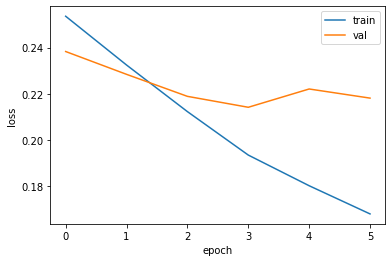

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

검증 세트에 대한 손실이 점차 감소하다가 정체되기 시작하고 훈련 세트에 대한 손실은 점점 더 낮아지고 있다. 이 그래프를 기반으로 네 번째 에포크를 최적으로 생각할 수 있다.

이번엔 세트에 대한 성능을 평가해 보자.

In [50]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 1s 102us/sample - loss: 0.2141 - acc: 0.9219


[0.21409657603502275, 0.92191666]

이 결과는 fit() 메서드의 출력중 4번째 에포크의 출력과 동일하다. 이번엔 predict() 메서드를 사용해 훈련된 모델을 써서 새로운 데이터에 대해 예측을 만들어 보자.

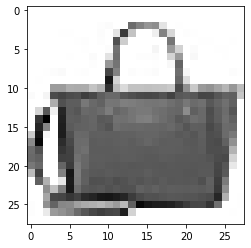

In [51]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

핸드백 이미지처럼 나왔다. 모델은 이 이미지에 대해 어떤 예측을 만드는지 확인해 보자. predict() 메서드는 10개의 클래스에 대한 예측 확률을 출력한다.

In [52]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.3269805e-14 3.9983306e-20 4.2651143e-17 8.0889534e-16 7.8657518e-17
  5.7268321e-16 2.4006134e-16 2.0645694e-16 1.0000000e+00 1.4048995e-15]]


출력 결과를 보면 아홉 번째 값이 1이고 다른 값은 거의 0에 가깝다.다시 말해 9번째 클래스라고 강하게 예측하고 있다. 이를 막대그래포 그려보자.

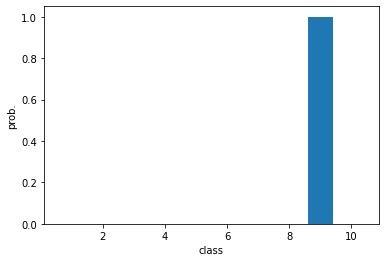

In [53]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

아홉 번째 클래스가 실제로 무엇인지 패션 MNIST 데이터셋의 정의를 참고해야 한다. 이제 파이썬에서 레이블을 다루기 위해 리스트로 저장해 보자.

In [54]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

preds 배열에서 가장 큰 인덱스를 찾아 classes 리스트의 인덱스로 사용하자.

In [55]:
import numpy as np
print(classes[np.argmax(preds)])

가방


이제 이 모델을 실전에 투입했을 때 얻을 수 있는 예상 성능을 측정해 보자.

픽셀값의 범위를 0 ~ 1 사이로 바꾸고 이미지 크기를 (28,28) 에서 (28,28,1)로 바꾸자.

In [56]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0

In [57]:
model.evaluate(test_scaled, test_target)

10000/10000 [==============================] - 1s 101us/sample - loss: 0.2359 - acc: 0.9147


[0.23594528354406358, 0.9147]

이 모델을 실전에 투입하면 약 91%의 성능을 기대해 볼수 있다.


## 08-3 합성곱 신경망의 시각화

### - 가중치 시각화

합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습한다. 각 필터는 커널이라 부르는 가중치와 절편을 가지고 있다. 일반저긍로 절편은 시각적으로 의미가 있지 않다. 가중치는 입력 이미지의 2차원 영역에 적용되며 어떤 특징을 크게 두드러지게 표현하는 역할을 한다. 그럼 2절에서 만든 모델이 어떤 가중치를 학습했는지 확인하기 위해 체크포인트 파일을 읽어오자.

In [71]:
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2021-05-27 15:04:35--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 15.164.81.167
Connecting to github.com (github.com)|15.164.81.167|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2021-05-27 15:04:36--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4044200 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5.1’

best-cnn-model.h5.1 100%[===================>]   3.86M  3.69MB/s    in 1.0s    

2021-05-27 15:04:38 (3.69 MB/s) - ‘best-cnn-model.h5.1’ saved [4044200/4044200]



케라스 모델에 추가한 층은 layers 속성에 저장되어 있다. 이 속성은 파이썬 리스트이다. model.layers를 출력해보자.

In [73]:
model.layers

이번엔 첫 번쨰 합성곱 층의 가중치를 조사해 보자. 층의 가중치와 절편은 층의 weights 속성에 저장되어 있다. 다음 코드에서 처럼 layers 속성의 첫 번째 원소를 선택해 weights의 첫 번째 원소(가중치)와 두 번째 원소(절편)의 크기를 출력해 보자.

In [75]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


이번에는 훈련하지 않은 빈 합성곱 신경망을 만들어 보자. 이 합성곱 층의 가중치가 위에서 본 훈련한 가중치와 어떻게 다른지 비교해 보자.

In [90]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))

In [91]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


이 가중치의 크기도 앞서 출력한 가중치와 같다. 동일하게 (3,3) 커널을 가진 필터를 32개 사용했기 때문이다.

### - 함수형 API

지금까지 신경망 모델을 만들 때 케라스 Sequential 클래스를 사용했다. 하지만 딥러닝에서는 조금 더 복잡한 모델이 많다. 예를 들어 입력이 2개일수도 있고 출력이 2개일 수도 있다. 이럴때에는 함수형 API를 사용한다.

model 객체의 입력은 아래처럼 model.input 속성으로 입력을 참조할 수 있다.

In [97]:
print(model.input)

Tensor("conv2d_10_input:0", shape=(?, 28, 28, 1), dtype=float32)


이제 model.input과 model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만들 수 있다.

In [99]:
conv_acti = keras.Model(model.input, model.layers[0].output)

### - 특성 맵 시각화

케라스로 패션 MNIST 데이터셋을 읽은 후 훈련 세트에 있는 첫 번째 샘플을 그려보자.

In [100]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

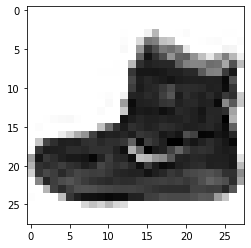

In [102]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

앵클 부츠처럼 보인다. 이 샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력해 보자. 하나의 샘플을 전달하더라도 꼭 첫 번쨰 차원을 유지해야 한다.

In [103]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [104]:
print(feature_maps.shape)

(1, 28, 28, 32)


이번엔 imshow 함수로 이 특성 맵을 그려보자. 총 32개의 특성 맵이 있으므로 4개의 행으로 나누어 그려보자.

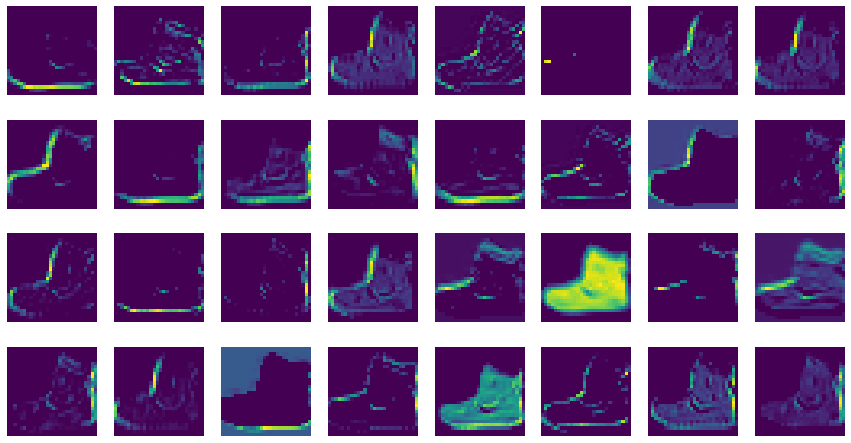

In [106]:
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in  range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
        
plt.show()

이 특성 맵은 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여준다.

두 번째 합성곱 층이 만든 특성 맵도 같은 방식으로 확인할 수 있다. 먼저 model 객체의 입력과 두 번째 합성곱 층인 model.layers[2]의 출력을 연결한 conv2_acti 모델을 만들자.

In [107]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

그다음 첫 번째 샘플을 conv2_acti 모델의 predict() 메서드에 전달한다.

In [108]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv2_acti.predict(inputs)

첫 번째 풀링 층에서 가로세로 크기가 절반으로 줄었고, 두 번째 합성곱 층의 필터 개수는 64개 이므로 feature_maps의 크기는 배치차원을 제외하면 (14,14,64)일 것이다. 한번 확인해 보자.

In [109]:
print(feature_maps.shape)

(1, 14, 14, 64)


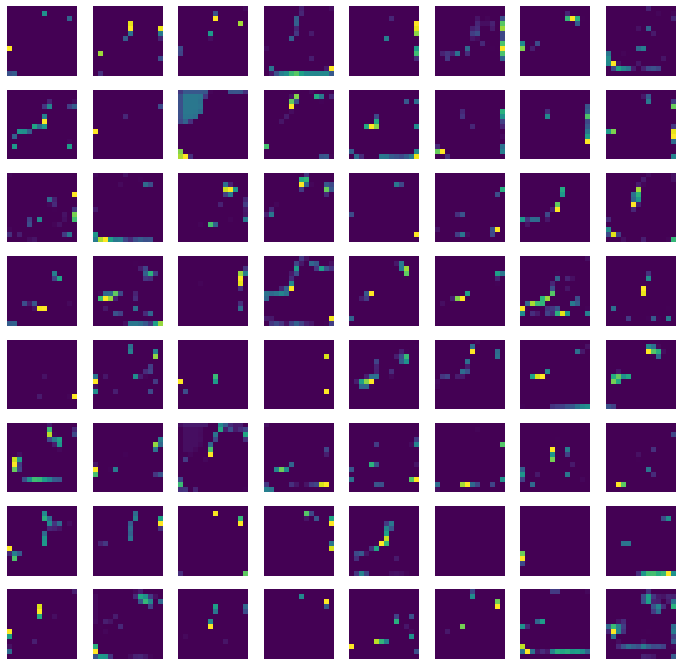

In [110]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

이 특성맵은 알아보기가 힘들다. 왜그럴까? 두 번째 합성곱 층의 필터 크기는 (3,3,32)이다. 두 번째 합성곱 층의 첫 번째 필터가 앞서 출력한 32개의 특성 맵과 곱해져 두 번째 합성곱 층의 첫 번째 특성 맵이 된다. 그래서 이렇게 계산된 출력은 (14,14,32) 특성 맵에서 어떤 부위를 감지하는지 직관적으로 이해하기가 어렵다.

이런 현상은 합성곱 층을 많이 쌓을수록 심해진다. 이를 바꾸어 생각하면 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 볼 수 있다.

출처 : 혼자 공부하는 머신러닝 + 딥러닝